# Find Linear Relationship Using sns

### Import dataset

In [2]:
import plotly.express as px
data = px.data.tips()

In [3]:
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [28]:
import seaborn as sns
sns.heatmap(data.corr(), 
            annot=True,          # with numbers
            square=True,         # square figure (not necessary)
            vmin= -1,            # vmin is correlation minimum value
            vmax = 1)            # vmax is correlation maximum value


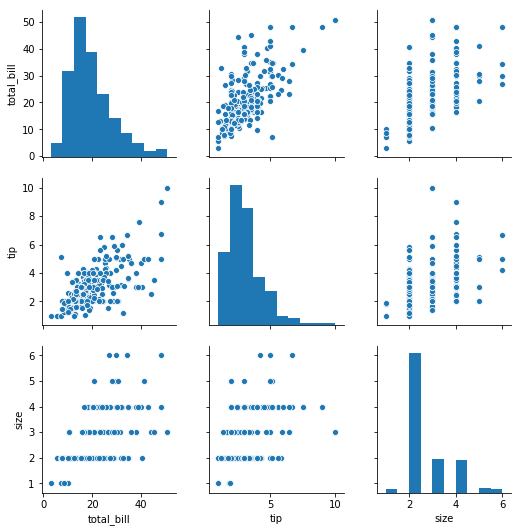

In [26]:
sns.pairplot(data)

In [29]:
data.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

In [87]:
# take the X variable with min and max correlation

def extract_linear_var_with_minmax_corr_values(dependent_var,data,min_corr_beyond,max_corr_beyond):
    """
    dependent_var = "tip"
    data = data
    min_corr_beyond = -0.9
    max_corr_beyond = 0.9
    
    return the result in dataframe format
    
    """
    # take one column Y
    df = data.corr()
    df_Y = df[dependent_var]
    lst_name = []
    lst_corr_val = []
    for i in range(len(df_Y)):
        if df_Y.index[i] == dependent_var:
            pass
        else:
            val = df_Y[i]
            if val<= min_corr_beyond or val>=max_corr_beyond:
                lst_name.append(df_Y.index[i])
                lst_corr_val.append(df_Y[i])
    # create a dataframe
    import pandas as pd
    data_f = pd.DataFrame({"For Dep Var '"+str(dependent_var)+"' the correlation beyond "+str(min_corr_beyond)+" and "+str(max_corr_beyond):lst_name,
                         "Correlation Value":lst_corr_val})
    return data_f

In [88]:
extract_linear_var_with_minmax_corr_values('tip',data,-0.4,0.4)

For Dep Var 'tip' the correlation beyond -0.4 and 0.4  Correlation Value
0                                            total_bill           0.675734
1                                                  size           0.489299